In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import tensorflow as tf 
import os 
import random
from pecnet import Pecnet
from scipy.fft import fft, fftfreq
from scipy.signal import welch
import matplotlib.pyplot as plt
from PyEMD import EMD


# This is for experiment consistency. 
def reset_random_seeds(seed):
   os.environ['PYTHONHASHSEED']=str(seed)
   tf.random.set_seed(seed)
   np.random.seed(seed)
   random.seed(seed)
reset_random_seeds(42)

In [44]:
# load data/KwhConsumptionBlower78_1.csv
energy_consumption1 = pd.read_csv('data/KwhConsumptionBlower78_1.csv')
energy_consumption2 = pd.read_csv('data/KwhConsumptionBlower78_2.csv')
energy_consumption3 = pd.read_csv('data/KwhConsumptionBlower78_3.csv')

energy_consumption = pd.concat([energy_consumption1, energy_consumption2, energy_consumption3], axis=0)
energy_consumption

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916
...,...,...,...,...
1743,1743,28 Feb 2022,22:01:52,1.020
1744,1744,28 Feb 2022,08:54:15,0.948
1745,1745,28 Feb 2022,06:26:48,0.912
1746,1746,28 Feb 2022,03:21:12,1.064


In [48]:
# merge columns TxnDate and TxnTime "01 Jan 2022"+"00:00:00"
energy_consumption['TxnDateTime'] = energy_consumption['TxnDate'] + ' ' + energy_consumption['TxnTime']
energy_consumption['TxnDateTime'] = pd.to_datetime(energy_consumption['TxnDateTime'], format='%d %b %Y %H:%M:%S')

# sort by TxnDateTime
energy_consumption = energy_consumption.sort_values(by=['TxnDateTime'])
energy_consumption.reset_index(drop=True, inplace=True)
energy_consumption

,Unnamed: 0,TxnDate,TxnTime,Consumption,TxnDateTime
0,77476,01 Jan 2022,00:22:28,1.030,2022-01-01 00:22:28
1,76780,01 Jan 2022,00:42:33,0.904,2022-01-01 00:42:33
2,76954,01 Jan 2022,01:01:51,0.904,2022-01-01 01:01:51
3,76548,01 Jan 2022,01:41:48,1.850,2022-01-01 01:41:48
4,77070,01 Jan 2022,02:22:52,1.878,2022-01-01 02:22:52
...,...,...,...,...,...
3601,1695,28 Feb 2022,22:25:43,1.152,2022-02-28 22:25:43
3602,1710,28 Feb 2022,22:44:37,0.888,2022-02-28 22:44:37
3603,1684,28 Feb 2022,23:07:15,1.064,2022-02-28 23:07:15
3604,1725,28 Feb 2022,23:29:13,1.036,2022-02-28 23:29:13


In [77]:
signal = energy_consumption["Consumption"].values

# EXP-1: STANDART VALUES

In [50]:
# 1 ölçüm 10-15 dk
window_sizes_1 = [1,4,12]
window_sizes_2 = [1,6,18]
window_sizes_3 = [1,20,40]

In [51]:
pecnet = Pecnet(experiment_name="Energy_exp1_1",
                sampling_periods=window_sizes_1,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

89/89 [==============================] - 0s 350us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


89/89 [==============================] - 0s 302us/step
Final train scores: RMSE: 1.7868400812149048, R2: 0.6762675304867609, MAPE: 1555965018112.0
23/23 [==============================] - 0s 310us/step
RMSE:  1.4117451
R2:  0.5116870881789622
MAPE:  0.3678077


In [52]:
pecnet = Pecnet(experiment_name="Energy_exp1_2",
                sampling_periods=window_sizes_2,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

89/89 [==============================] - 0s 362us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


89/89 [==============================] - 0s 323us/step
Final train scores: RMSE: 1.869808316230774, R2: 0.6469113264214115, MAPE: 1127911784448.0
22/22 [==============================] - 0s 331us/step
RMSE:  1.4879951
R2:  0.46078521364239566
MAPE:  0.494081


In [53]:
pecnet = Pecnet(experiment_name="Energy_exp1_3",
                sampling_periods=window_sizes_3,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

87/87 [==============================] - 0s 313us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


86/86 [==============================] - 0s 329us/step
Final train scores: RMSE: 1.9302855730056763, R2: 0.604047595217966, MAPE: 1785143754752.0
22/22 [==============================] - 0s 351us/step
RMSE:  1.9508209
R2:  0.0658326797586194
MAPE:  1.037704


# EXP-2.1: FFT VALUES

In [56]:
def get_fft(signal, fs):
    fourier = np.fft.fft(signal)
    n= len(signal)
    frequencies = np.fft.fftfreq(n, d=1/fs) 
    positive_frequencies = frequencies[np.where(frequencies>0)] 
    magnitudes = abs(fourier[np.where(frequencies >0)])
    return positive_frequencies, magnitudes

2


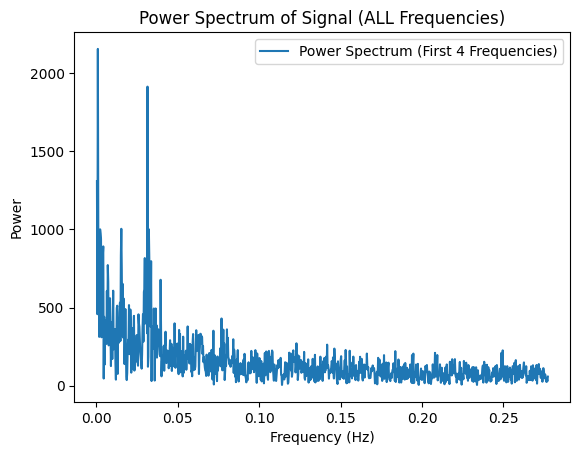

In [57]:
fs = 1

positive_frequencies, magnitudes = get_fft(signal, fs)
peak_frequency = np.argmax(magnitudes)
print(peak_frequency)
plt.plot(positive_frequencies[:1000], magnitudes[:1000], label='Power Spectrum (First 4 Frequencies)')
plt.title('Power Spectrum of Signal (ALL Frequencies)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

In [58]:
def en_buyuk_uc_indexleri_bul(array):
    if len(array) < 3:
        print("Dizi en az 3 eleman içermelidir.")
        return
    
    sirali_dizi = sorted(enumerate(array), key=lambda x: x[1], reverse=True)
    en_buyuk_uc_indexler = [index for index, value in sirali_dizi[:3]]
    sirali_dizi_indexler = [index for index, value in sirali_dizi]
    
    return en_buyuk_uc_indexler, sirali_dizi_indexler

top_3_idx, sorted_idx = en_buyuk_uc_indexleri_bul(magnitudes)

print("Power spectrumda En büyük üç değerin index'leri:", top_3_idx)
for idx in top_3_idx:
    print("En büyük üç değerin frekansları:", positive_frequencies[idx])
    print("En büyük üç değerin windowları:", (round(1 / (positive_frequencies[idx]))))

Power spectrumda En büyük üç değerin index'leri: [2, 112, 0]
En büyük üç değerin frekansları: 0.000831946755407654
En büyük üç değerin windowları: 1202
En büyük üç değerin frekansları: 0.031336661120354964
En büyük üç değerin windowları: 32
En büyük üç değerin frekansları: 0.00027731558513588466
En büyük üç değerin windowları: 3606


In [65]:
def select_meaningful_periods(positive_frequencies, sorted_idx):
    top_freqs = [positive_frequencies[idx] for idx in sorted_idx]
    top_periods = [round(1 / freq) for freq in top_freqs]
    # select periods that are less than 0.1% of the signal length
    top_periods_eliminated = [period for period in top_periods if period < len(signal)*0.01]
    # remove reduntant periods without losing order
    top_periods_final = []
    for period in top_periods_eliminated:
        if period not in top_periods_final:
            top_periods_final.append(period)
    return top_periods_final

In [66]:
periods = select_meaningful_periods(positive_frequencies, sorted_idx)
periods[:2]

[32, 31]

In [67]:
window_length_fft = [1,31,32]

In [68]:
pecnet = Pecnet(experiment_name="Carbon_exp2_1",
                sampling_periods=window_length_fft,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

87/87 [==============================] - 0s 307us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 0s 320us/step
Final train scores: RMSE: 1.9095138311386108, R2: 0.6165275807276234, MAPE: 4089611288576.0
22/22 [==============================] - 0s 346us/step
RMSE:  1.8879681
R2:  0.1213664299451912
MAPE:  0.60265493


# EXP-2.2: WELCH VALUES

7


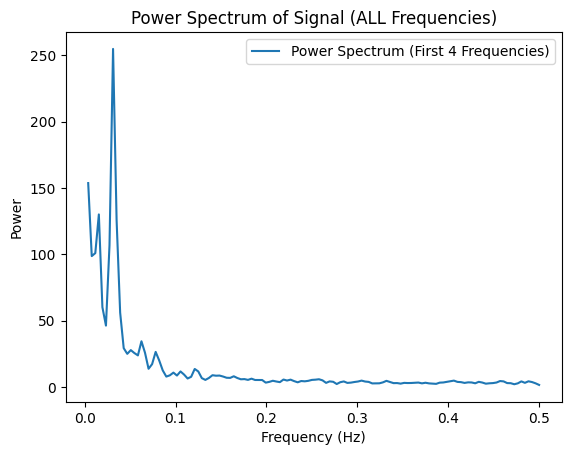

In [69]:
# https://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/

def get_psd_values(y_values, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    # return only positive frequencies and respective PSD values
    positive_frequencies = f_values[np.where(f_values>0)]
    positive_psd = psd_values[np.where(f_values>0)]
    return positive_frequencies, positive_psd

positive_frequencies, magnitudes = get_psd_values(signal, fs)
peak_frequency = np.argmax(magnitudes)
print(peak_frequency)
plt.plot(positive_frequencies[:1000], magnitudes[:1000], label='Power Spectrum (First 4 Frequencies)')
plt.title('Power Spectrum of Signal (ALL Frequencies)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

In [70]:
top_3_idx, sorted_idx = en_buyuk_uc_indexleri_bul(magnitudes)

print("Power spectrumda En büyük üç değerin index'leri:", top_3_idx)
for idx in top_3_idx:
    print("En büyük üç değerin frekansları:", positive_frequencies[idx])
    print("En büyük üç değerin windowları:", (round(1 / (positive_frequencies[idx]))))

Power spectrumda En büyük üç değerin index'leri: [7, 0, 3]
En büyük üç değerin frekansları: 0.03125
En büyük üç değerin windowları: 32
En büyük üç değerin frekansları: 0.00390625
En büyük üç değerin windowları: 256
En büyük üç değerin frekansları: 0.015625
En büyük üç değerin windowları: 64


In [71]:
periods = select_meaningful_periods(positive_frequencies, sorted_idx)
periods[:2]

[32, 28]

In [72]:
window_length_welch = [1,28,32]

In [73]:
pecnet = Pecnet(experiment_name="Carbon_exp2_2",
                sampling_periods=window_length_welch,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

87/87 [==============================] - 0s 331us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 0s 313us/step
Final train scores: RMSE: 1.880740761756897, R2: 0.62799704736015, MAPE: 2386590171136.0
22/22 [==============================] - 0s 352us/step
RMSE:  1.7173742
R2:  0.2729767727435295
MAPE:  0.5248335


# EXP-3.1: EMD + FFT

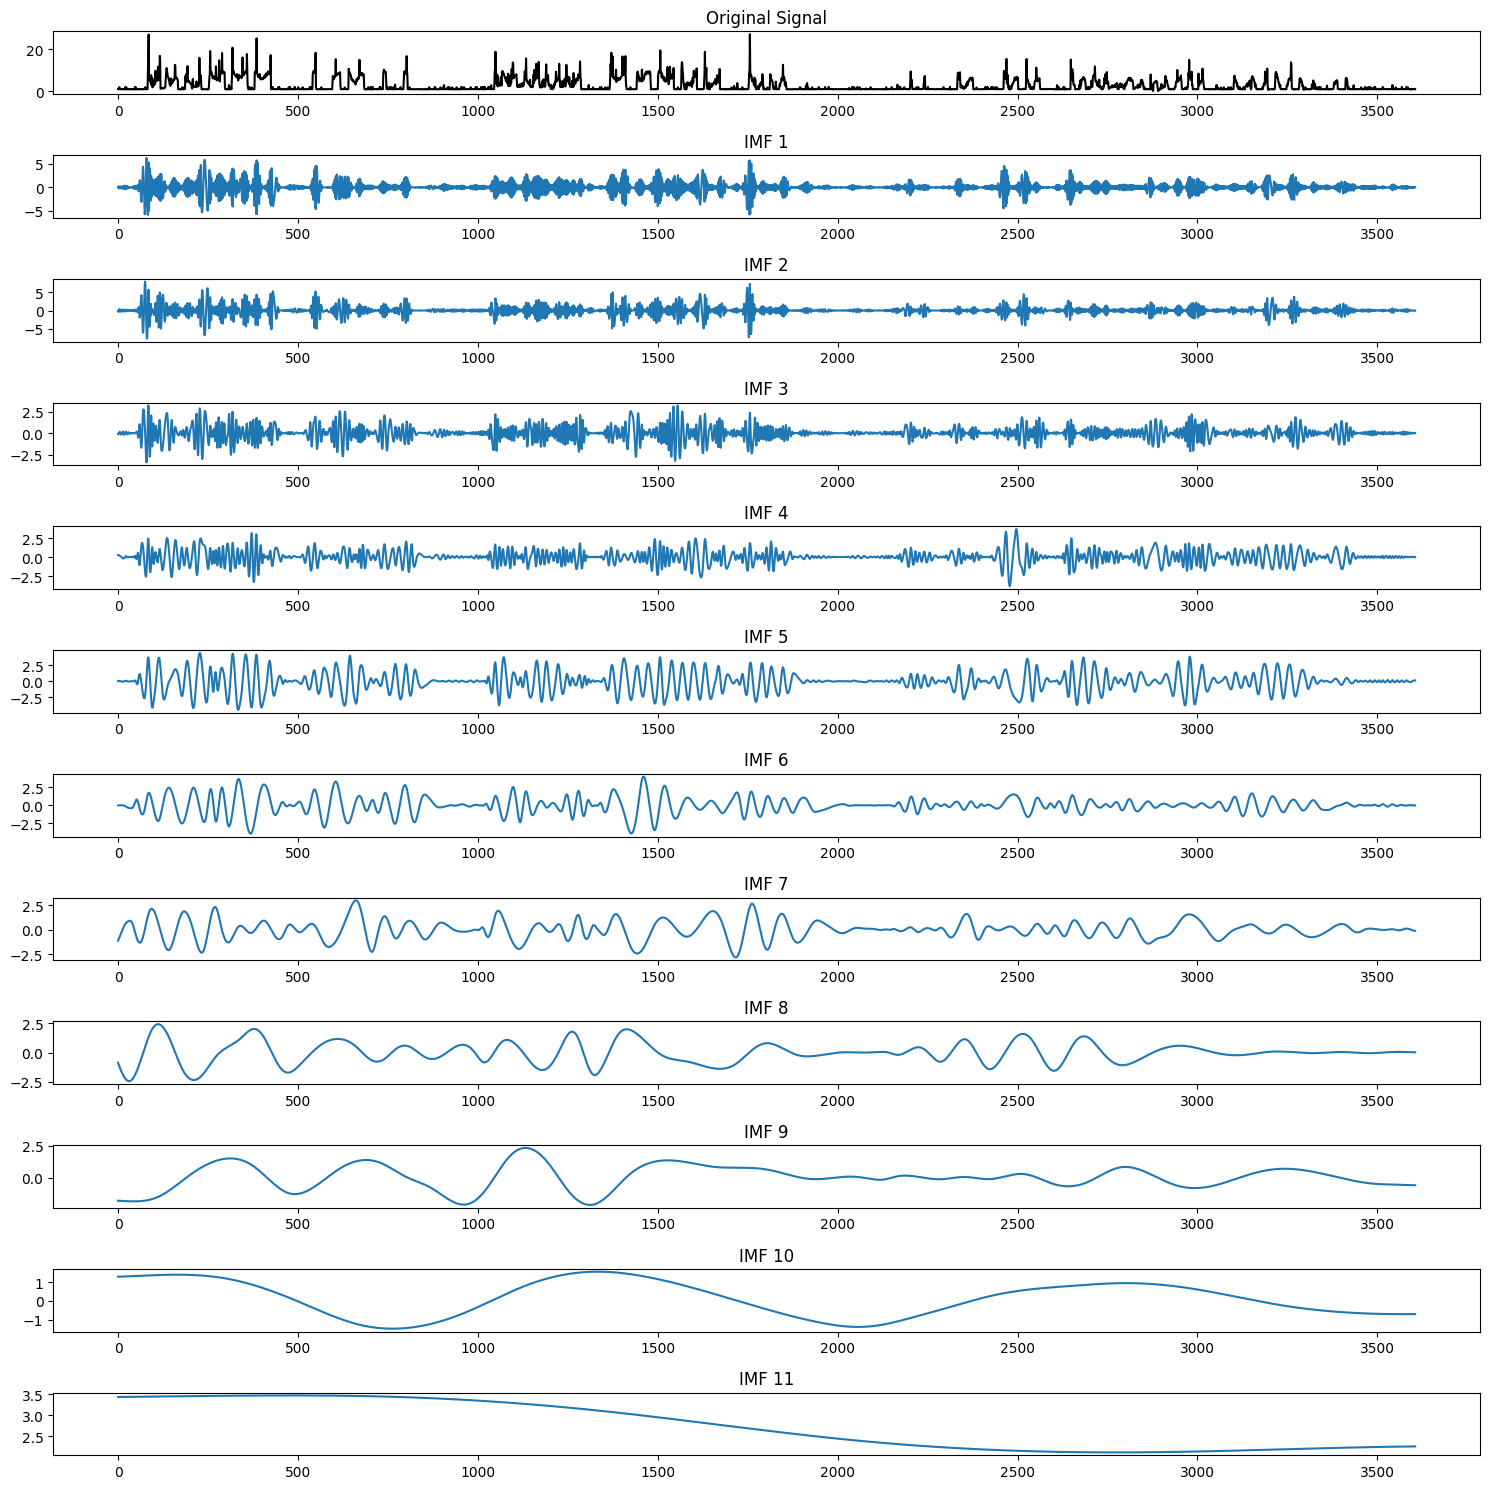

In [78]:
# Apply Empirical Mode Decomposition (EMD)
emd = EMD()
IMFs = emd(signal)


# Plot the original signal and its IMFs
plt.figure(figsize=(15, 15))

plt.subplot(len(IMFs) + 1, 1, 1)
plt.plot(energy_consumption.index, signal, label='Original Signal', color='black')
plt.title('Original Signal')

for i in range(len(IMFs)):
    plt.subplot(len(IMFs) + 1, 1, i + 2)
    plt.plot(energy_consumption.index, IMFs[i], label=f'IMF {i + 1}')
    plt.title(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

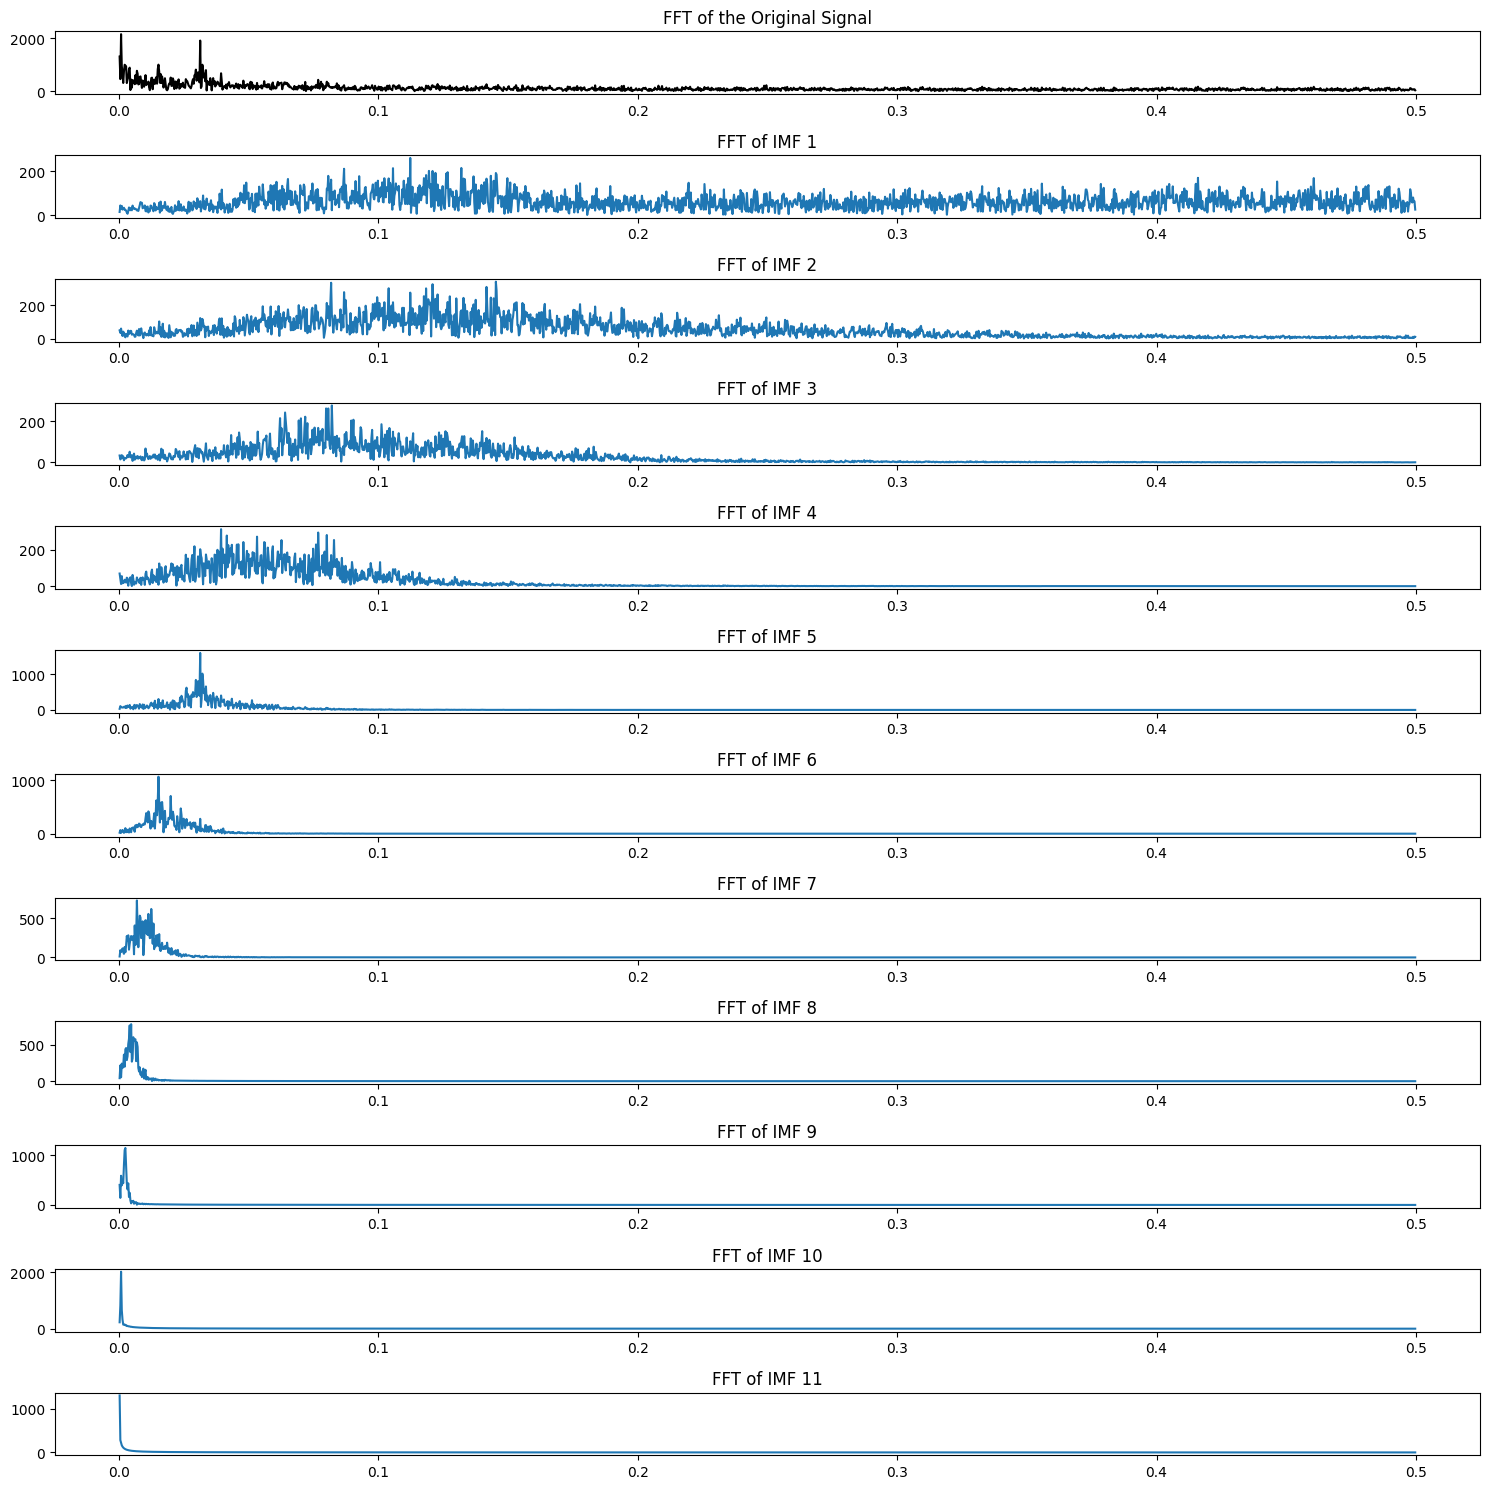

In [79]:
fs =  1

# Plot the original signal and its IMFs
plt.figure(figsize=(15, 15))

plt.subplot(len(IMFs) + 1, 1, 1)
positive_frequencies, magnitudes = get_fft(signal, fs)
plt.plot(positive_frequencies, magnitudes, label='Original Signal', color='black')
plt.title('FFT of the Original Signal')

for i in range(len(IMFs)):
    plt.subplot(len(IMFs) + 1, 1, i + 2)
    positive_frequencies, magnitudes = get_fft(IMFs[i], fs)
    plt.plot(positive_frequencies, magnitudes, label=f'IMF {i + 1}')
    plt.title(f'FFT of IMF {i + 1}')

plt.tight_layout()
plt.show()

In [80]:
# Calculate sampling frequency
periods=[]
days=len(signal)
for i, imf in enumerate(IMFs):
    freq, magnitudes = get_fft(imf, fs)
    idx=np.argmax(magnitudes)
    print("IMF idx: ", i)
    print("Dominant freq idx: ", idx)
    print("Window size: ",round(1/freq[idx]))
    print("\n")
    periods.append(round(1/freq[idx]))


IMF idx:  0
Dominant freq idx:  404
Window size:  9


IMF idx:  1
Dominant freq idx:  523
Window size:  7


IMF idx:  2
Dominant freq idx:  295
Window size:  12


IMF idx:  3
Dominant freq idx:  141
Window size:  25


IMF idx:  4
Dominant freq idx:  112
Window size:  32


IMF idx:  5
Dominant freq idx:  54
Window size:  66


IMF idx:  6
Dominant freq idx:  24
Window size:  144


IMF idx:  7
Dominant freq idx:  16
Window size:  212


IMF idx:  8
Dominant freq idx:  8
Window size:  401


IMF idx:  9
Dominant freq idx:  2
Window size:  1202


IMF idx:  10
Dominant freq idx:  0
Window size:  3606




In [81]:
periods[:3]

[9, 7, 12]

In [82]:
window_length_emd_fft = [1, 7, 9]

In [83]:
pecnet = Pecnet(experiment_name="Carbon_exp3_1",
                sampling_periods=window_length_emd_fft,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4)

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

90/90 [==============================] - 0s 313us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 0s 316us/step
Final train scores: RMSE: 1.9065766334533691, R2: 0.6306096953676513, MAPE: 1341729800192.0
23/23 [==============================] - 0s 327us/step
RMSE:  1.4644248
R2:  0.4733228776575057
MAPE:  0.39773375


# EXP-3.2: EMD + WELCH

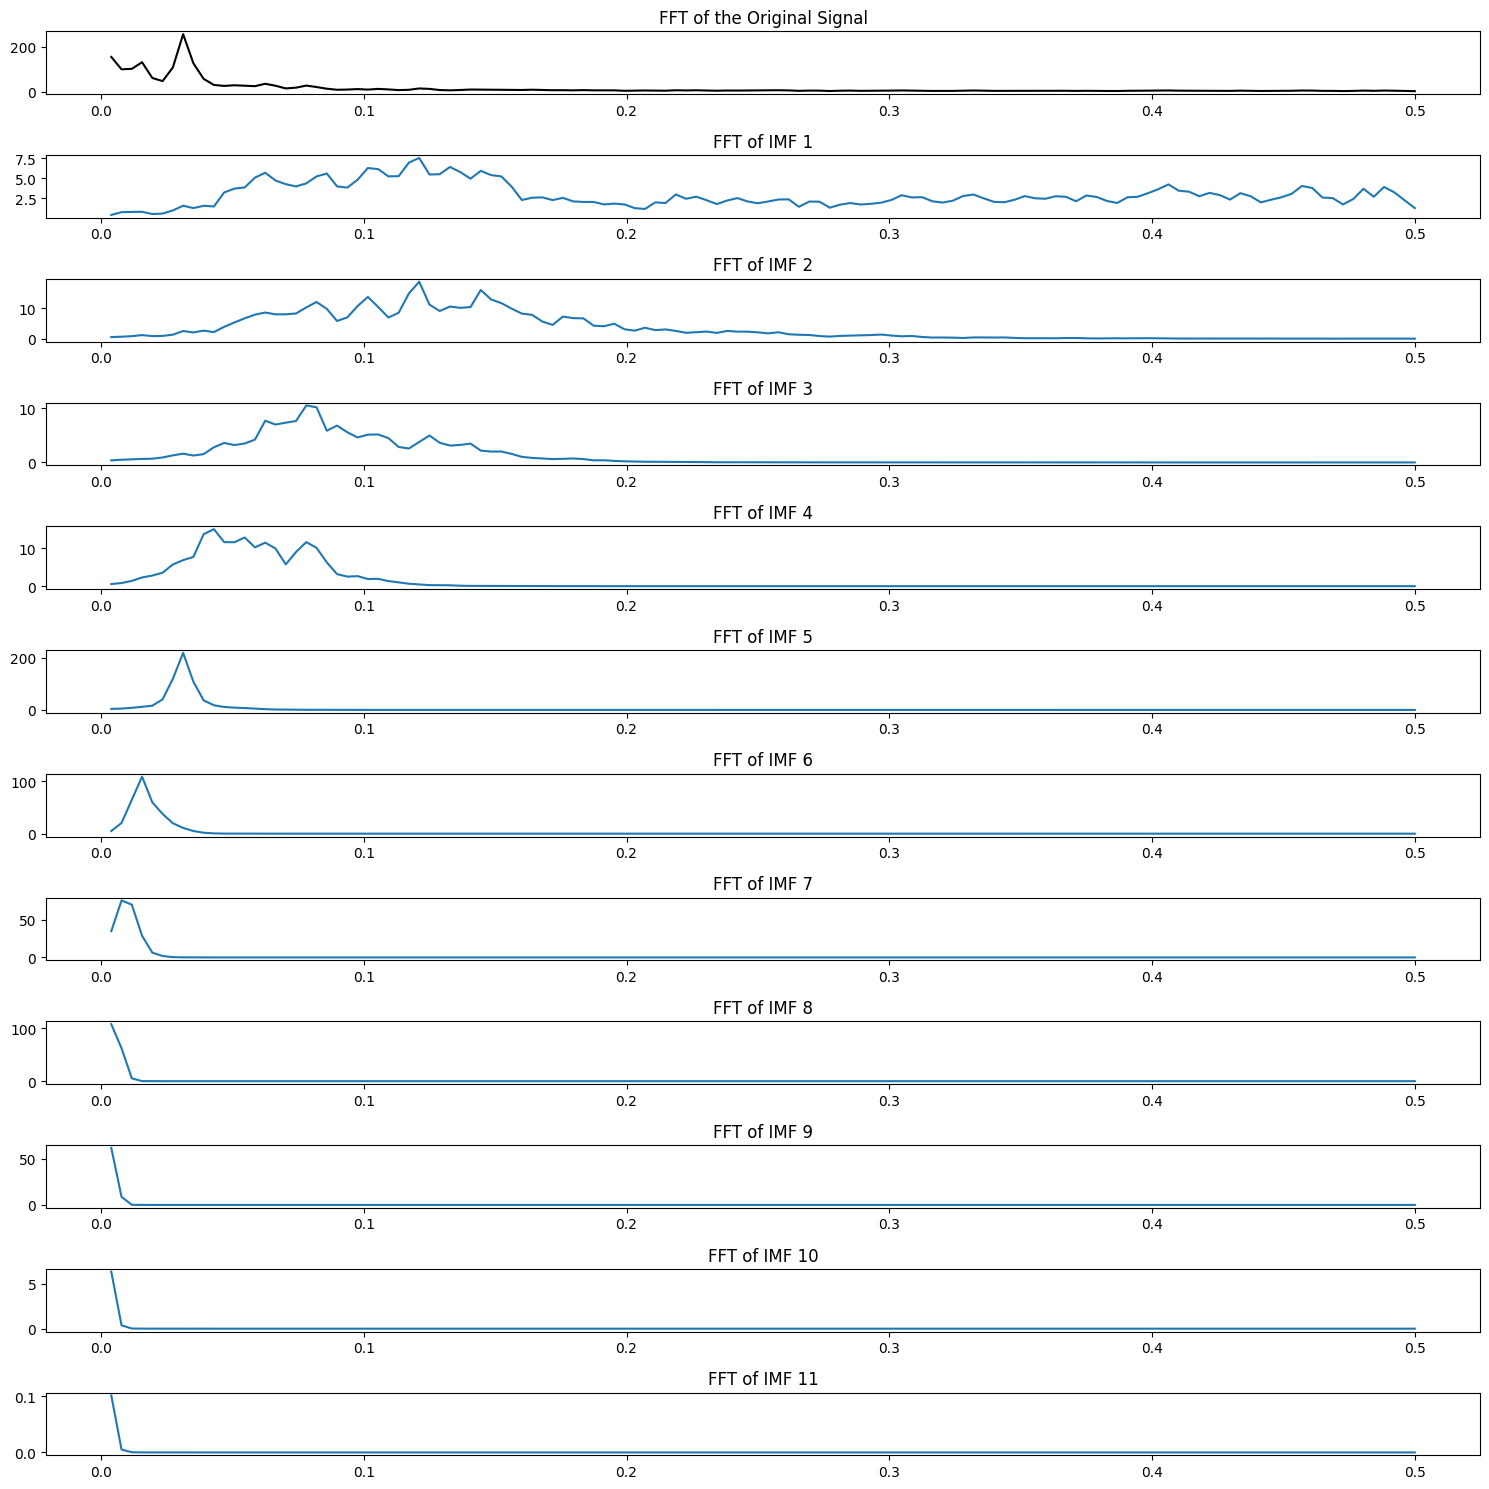

In [84]:
fs =  1

# Plot the original signal and its IMFs
plt.figure(figsize=(15, 15))

plt.subplot(len(IMFs) + 1, 1, 1)
positive_frequencies, magnitudes = get_psd_values(signal, fs)
plt.plot(positive_frequencies, magnitudes, label='Original Signal', color='black')
plt.title('FFT of the Original Signal')

for i in range(len(IMFs)):
    plt.subplot(len(IMFs) + 1, 1, i + 2)
    positive_frequencies, magnitudes = get_psd_values(IMFs[i], fs)
    plt.plot(positive_frequencies, magnitudes, label=f'IMF {i + 1}')
    plt.title(f'FFT of IMF {i + 1}')

plt.tight_layout()
plt.show()

In [85]:
# Calculate sampling frequency
periods=[]
days=len(signal)
for i, imf in enumerate(IMFs):
    freq, magnitudes = get_fft(imf, fs)
    idx=np.argmax(magnitudes)
    print("IMF idx: ", i)
    print("Dominant freq idx: ", idx)
    print("Window size: ",round(1/freq[idx]))
    print("\n")
    periods.append(round(1/freq[idx]))

IMF idx:  0
Dominant freq idx:  404
Window size:  9


IMF idx:  1
Dominant freq idx:  523
Window size:  7


IMF idx:  2
Dominant freq idx:  295
Window size:  12


IMF idx:  3
Dominant freq idx:  141
Window size:  25


IMF idx:  4
Dominant freq idx:  112
Window size:  32


IMF idx:  5
Dominant freq idx:  54
Window size:  66


IMF idx:  6
Dominant freq idx:  24
Window size:  144


IMF idx:  7
Dominant freq idx:  16
Window size:  212


IMF idx:  8
Dominant freq idx:  8
Window size:  401


IMF idx:  9
Dominant freq idx:  2
Window size:  1202


IMF idx:  10
Dominant freq idx:  0
Window size:  3606




In [86]:
periods[:3]

[9, 7, 12]

In [87]:
window_length_emd_welch = [1, 7, 9]

In [88]:
pecnet = Pecnet(experiment_name="IBM_exp3_2",
                sampling_periods=window_length_emd_welch,
                sampling_statistics=["mean"],
                sequence_length=4,
                sequence_length_em=4,
                wavelet="sym2")

X_train, X_test, y_train, y_test = pecnet.preprocess(signal)
pecnet.fit(X_train, y_train)
preds = pecnet.predict(X_test, y_test_past=y_test[:-1])
rmse, r2, mape = pecnet._calculate_scores(preds, y_test[-len(preds):])
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAPE: ", mape)

90/90 [==============================] - 0s 395us/step


/Users/hakkoz/opt/anaconda3/envs/serkanTez/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 0s 325us/step
Final train scores: RMSE: 1.9090873003005981, R2: 0.6296361937853485, MAPE: 431497052160.0
23/23 [==============================] - 0s 319us/step
RMSE:  1.3349898
R2:  0.5623105580016547
MAPE:  0.40199915


RMSE:  6.596613
R2:  -0.04448303388824093
MAPE:  0.2594344